In [1]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from fastai2.vision.models.xresnet import xresnet50

In [2]:
path = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = (path/'centers.pkl').load()

In [3]:
biwi = DataBlock(blocks=(ImageBlock, PointBlock),
                 get_items = get_image_files,
                 get_y = lambda o:fn2ctr[o.name].flip(0),
                 splitter=RandomSplitter())

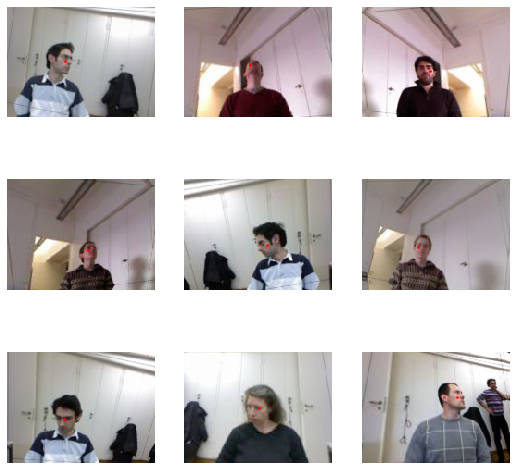

In [4]:
dbunch = biwi.databunch(
    path, 
    batch_tfms=[
        *aug_transforms(size=(120,160)), 
        Normalize.from_stats(*imagenet_stats)
    ]
)
dbunch.show_batch(max_n=9, vmin=1, vmax=30)

In [5]:
dbunch.c = dbunch.after_item.c
dbunch.train_ds.loss_func = MSELossFlat()

In [8]:
learn = cnn_learner(dbunch, xresnet50)
learn.fit_one_cycle(3, 1e-3)

In [ ]:
learn.predict(dbunch.train_ds.items[0])

In [ ]:
learn.show_results(max_n=4)

In [ ]:
# TODO 
# See if all this works
# Replace data with pets
# Export data